In [13]:
%%HTML
<style>
.container { width:100%  } 
</style>

# Simple Linear Regression

We need to read our data from a <tt>csv</tt> file.  The module `csv` offers a number of functions for reading and writing a <tt>csv</tt> file.

In [14]:
import csv

The data we want to read is contained in the <tt>csv</tt> file `cars.csv`, which is located in the subdirectory `Python`.  In this file, the first column has the *miles per gallon*, while the *engine displacement* is given in the third column.  We convert *miles per gallon* into *km per litre* and *cubic inches* into *litres*.

In [15]:
with open('cars.csv') as cars_file:
    reader       = csv.DictReader(cars_file, delimiter=',')
    line_count   = 0
    kpl          = [] # kilometer per litre
    displacement = [] # engine displacement
    for row in reader:
        if line_count != 0:  # skip header of file
            kpl         .append(float(row['mpg']) * 1.60934 / 3.78541)  
            displacement.append(float(row['displacement']) * 0.0163871)  
        line_count += 1
print(f'{line_count} lines read')

392 lines read


Now `kpl` is a list of floating point numbers specifying the 
<em style="color:blue;">fuel efficiency</em>, while the list `displacement` 
contains the corresponding <em style="color:blue;">engine displacements</em> 
measured in litres.

In [16]:
kpl[:5]

[6.3771427665695395,
 7.652571319883447,
 6.802285617674175,
 7.227428468778811,
 6.3771427665695395]

In [17]:
displacement[:5]

[5.735485000000001, 5.2110978, 4.981678400000001, 4.9489042, 7.0300659]

The number of data pairs of the form $\langle x, y \rangle$ that we have read is stored in the variable `m`.

In [18]:
m = len(displacement)
m

391

In order to be able to plot the <em style="color:blue;">fuel efficiency</em>
versus the <em style="color:blue;">engine displacement</em> and  we turn the 
lists `displacement` and `mpg` into `numpy` arrays.  This is also very usefull in order to compute the coefficients $\vartheta_0$ and $\vartheta_1$ later.

In [19]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

Since <em style="color:blue;">kilometres per litre</em> is the **inverse** of the fuel consumption, the vector `Y` is defined as follows:

In [20]:
X = np.array(displacement)

In [21]:
Y = np.array([100 / y for y in kpl])

Text(0.5, 1.0, 'fuel consumption versus engine displacement')

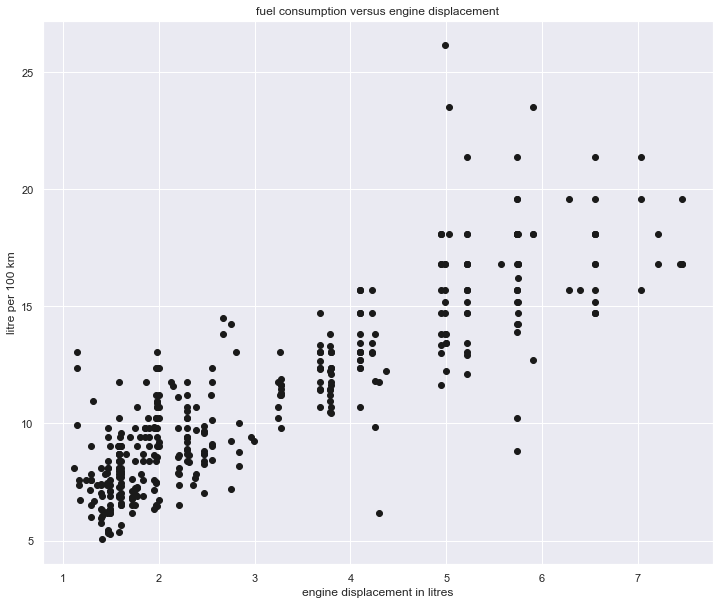

In [22]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.scatter(X, Y, c='k') # 'k' is short for black
plt.xlabel('engine displacement in litres')
plt.ylabel('litre per 100 km')
plt.title('fuel consumption versus engine displacement')

We compute the average engine displacement according to the formula:
$$ \bar{\mathbf{x}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m x_i $$ 

In [11]:
xMean = np.mean(X)
xMean

3.1811300709718675

We compute the average fuel consumption according to the formula:
$$ \bar{\mathbf{y}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m y_i $$ 

In [12]:
yMean = np.mean(Y)
yMean

11.243903067338254

The coefficient $\vartheta_1$ is computed according to the formula:
$$ \vartheta_1 = \frac{\sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr) \cdot \bigl(y_i - \bar{\mathbf{y}}\bigr)}{
                       \sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr)^2}  
$$

In [23]:
ϑ1 = np.sum((X - xMean) * (Y - yMean)) / np.sum((X - xMean) ** 2)
ϑ1

1.9796015799796967

The coefficient $\vartheta_0$ is computed according to the formula:
$$ \vartheta_0 = \bar{\mathbf{y}} - \vartheta_1 \cdot \bar{\mathbf{x}} $$ 

In [24]:
ϑ0 = yMean - ϑ1 * xMean
ϑ0

4.94653295272142

Let us plot the line $y(x) = ϑ0 + ϑ1 \cdot x$ together with our data:

Text(0.5, 1.0, 'Fuel Consumption versus Engine Displacement')

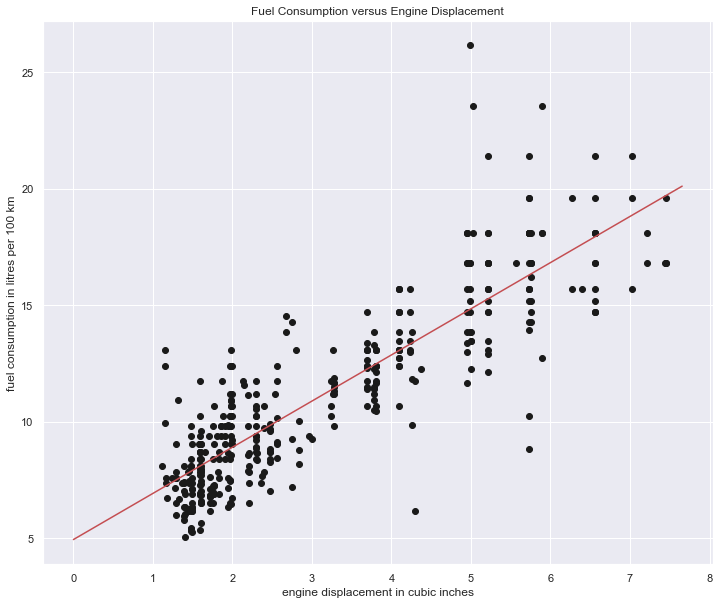

In [25]:
xMax = max(X) + 0.2
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.scatter(X, Y, c='k')
plt.plot([0, xMax], [ϑ0, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('engine displacement in cubic inches')
plt.ylabel('fuel consumption in litres per 100 km')
plt.title('Fuel Consumption versus Engine Displacement')

We see there is quite a bit of variation and apparently the engine displacement explains only a part of the fuel consumption.  In order compute the coefficient of determination, i.e. the statistics $R^2$, we first compute the *total sum of squares* `TSS`according to the following formula:
$$ \mathtt{TSS} := \sum\limits_{i=1}^m \bigl(y_i - \bar{\mathbf{y}}\bigr)^2 $$

In [26]:
TSS = np.sum((Y - yMean) ** 2)
TSS

5986.096591625628

Next, we compute the *residual sum of squares* `RSS` as follows:
$$ \mathtt{RSS} := \sum\limits_{i=1}^m \bigl(\vartheta_1 \cdot x_i + \vartheta_0 - y_i\bigr)^2 $$
    

In [27]:
RSS = np.sum((ϑ1 * X + ϑ0 - Y) ** 2)
RSS

1493.7394979314595

Now $R^2$ is calculated via the formula:
$$ R^2 = 1 - \frac{\mathtt{RSS}}{\mathtt{TSS}}$$

In [28]:
R2 = 1 - RSS/TSS
R2

0.7504651862749497

It seems that about $75\%$ of the fuel consumption is explained by the engine displacement.  We can get a better model of the fuel consumption if we use more variables for explaining the fuel consumption.  For example, the weight of a car is also responsible for its fuel consumption.